In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_config = {"F":100,"ionoNharm":6,"domainLengthInF":3.6,"maxN_PS":15,"PoissonLambda_amplPS":5,"numPsiSamples":7,"xi":0.5,"relNoiseCoeff":0.05,"addSpeckleCoeff":0.05,"minScattererRadius":1,"ionoAmplOverPi":4,"F_to_lmax":1.5,"windowType":"rect","sumType":"trapz"}

df = pd.read_csv("/home/houtlaw/iono-net/model/training_losses_image.csv")

#df = pd.read_csv("/home/houtlaw/iono-net/model/training_losses_conv.csv")

df.head()

,Epoch,Training Loss,Test Loss,Fourier Loss,Image Loss
0,1,0.712279,0.004667,27.943182,0.044696
1,2,0.538391,0.005014,23.914556,0.033817
2,3,0.416619,0.004465,8.425692,0.026227
3,4,0.345349,0.003469,1.834937,0.021658
4,5,0.330792,0.002729,1.739293,0.020790


Text(0.5, 1.0, 'Training and Validation Loss across Epochs (Image + Coeff Loss) \n relNoiseCoeff: 0.05, addSpeckleCoeff: 0.05, ionoAmplOverPi: 4, ionoNHarm: 6')

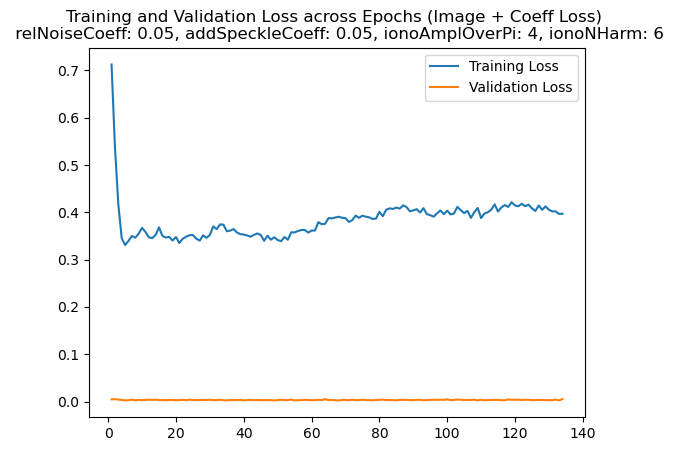

In [3]:
plt.plot(df["Epoch"], df["Training Loss"], label = "Training Loss")
plt.plot(df["Epoch"], df["Test Loss"], label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss across Epochs (Image + Coeff Loss) \n relNoiseCoeff: 0.05, addSpeckleCoeff: 0.05, ionoAmplOverPi: 4, ionoNHarm: 6")

Text(0.5, 1.0, 'Training Loss Component Terms across Training Epochs')

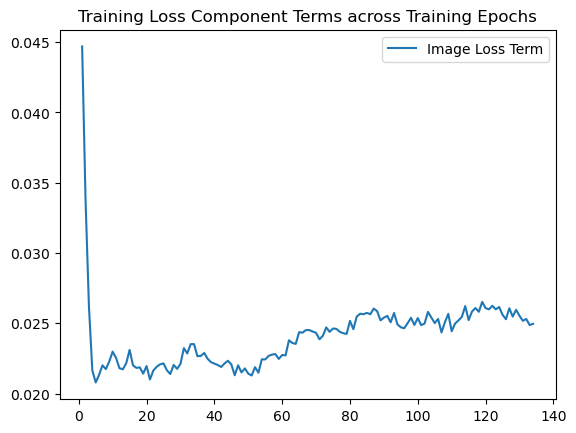

In [7]:
#plt.plot(df["Epoch"], df["Fourier Loss"], label = "Ψ Coefficient Loss Term")
plt.plot(df["Epoch"], df["Image Loss"], label = "Image Loss Term")
plt.legend()
plt.title("Training Loss Component Terms across Training Epochs")